In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [13]:
lung_df = pd.read_csv("cancer_patient_data_sets.csv")
lung_df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [14]:
print(lung_df.isnull().sum())
lung_df.drop_duplicates(keep='first')

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [15]:
x = lung_df.drop('index', axis=1)
x = x.drop('Patient Id', axis=1)
y = x['Level']
x = x.drop('Level', axis=1)
y

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = classifier.predict(X_test)

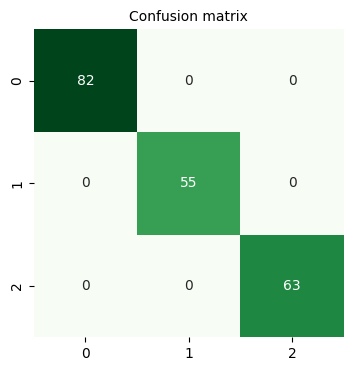

Train Set Accuracy:100.0
Test Set Accuracy:100.0


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
result = confusion_matrix(y_test, y_pred)
rfc_acc=accuracy_score(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Greens', cbar = False).set_title("Confusion matrix", fontsize = 10)
plt.show()

print("Train Set Accuracy:"+str(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,classifier.predict(X_test))*100))

#### Multinomial Logistic Regression

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


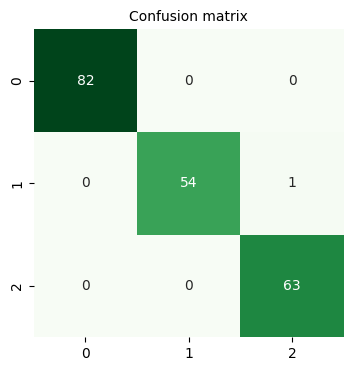

Train Set Accuracy:99.875
Test Set Accuracy:99.5


In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2', multi_class='multinomial')
log_reg.fit(X_train,y_train)

Y_pred = log_reg.predict(X_test)
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, fmt = 'd', cmap = 'Greens', cbar = False).set_title("Confusion matrix", fontsize = 10)
plt.show()

log_acc=accuracy_score(y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,log_reg.predict(X_test))*100))

#### SVC

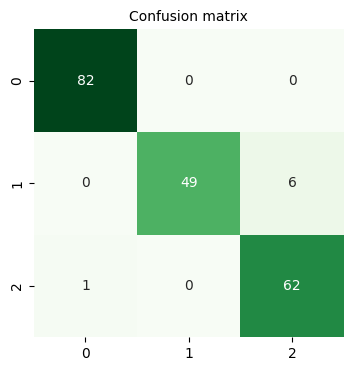

Train Set Accuracy:97.125
Test Set Accuracy:96.5


In [26]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)    

Y_pred = svm.predict(X_test)
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, fmt = 'd', cmap = 'Greens', cbar = False).set_title("Confusion matrix", fontsize = 10)
plt.show()

svm_acc= accuracy_score(y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,svm.predict(X_test))*100))

#### Gradient Boosting Classifier

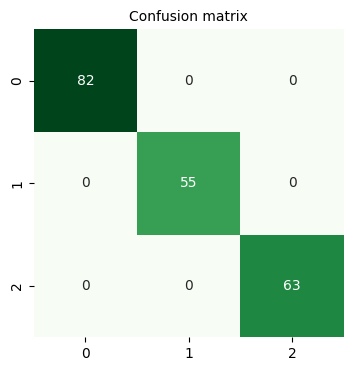

Train Set Accuracy:100.0
Test Set Accuracy:100.0


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


Y_pred = gbc.predict(X_test)
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, fmt = 'd', cmap = 'Greens', cbar = False).set_title("Confusion matrix", fontsize = 10)
plt.show()

gbc_acc=accuracy_score(y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,gbc.predict(X_test))*100))

#### Decision Tree

Accuracy:  0.92
Precision:  0.9291433823529411
Recall:  0.92
F1 score:  0.9199027906151431


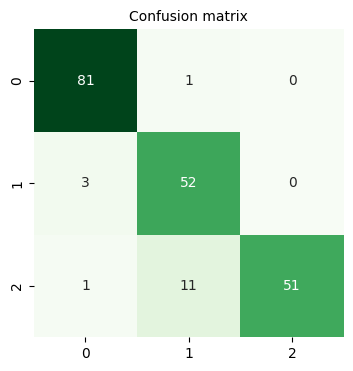

In [30]:
# Build the decision tree classifier- gini
clf_gini= DecisionTreeClassifier(criterion='gini',
                                max_depth= 2,
                                random_state= 0)

# Train the classifier
clf_gini.fit(X_train, y_train)

# Predicting results for the test set
y_pred= clf_gini.predict(X_test)

# Evaluate the model
dtc_acc= metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',dtc_acc )

# Compute the precision of the model
precision = metrics.precision_score(y_test, y_pred, average= 'weighted')
print('Precision: ', precision)

# Compute the recall of the model
recall = metrics.recall_score(y_test, y_pred,  average= 'weighted')
print('Recall: ', recall)

# Compute the F1 score of the model
f1 = metrics.f1_score(y_test, y_pred, average= 'weighted')
print('F1 score: ', f1)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Greens', cbar = False).set_title("Confusion matrix", fontsize = 10)
plt.show()

In [31]:
models = pd.DataFrame({
    'Model': ['Random Forest','Multinomial Logistic Regression', 'SVC',  'Decision Tree Classifier',
             'Gradient Boosting Classifier'],
    'Score': [ rfc_acc,log_acc, svm_acc, dtc_acc, gbc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest,1.000
4,Gradient Boosting Classifier,1.000
1,Multinomial Logistic Regression,0.995
2,SVC,0.965
3,Decision Tree Classifier,0.920


In [32]:
model = LogisticRegression(C=1,penalty='l2', multi_class='multinomial')
model.fit(X_train,y_train)

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, multi_class='multinomial')

In [33]:
import pickle
pickle_out = open("lung_cancer.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()